# Assignment- Linear Regression

- Submitted by:
    Vaishali Singh

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

### Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data

Importing the CarPrice Assignement Dataset

In [2]:
carprice = pd.read_csv(r"CarPrice_Assignment.csv")
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Inspection

In [3]:
carprice.shape

(205, 26)

In [4]:
carprice.info()
carprice.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


There are no null values in the data-set thus we are good to perform analysis and need not to do data-cleansing

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

In [5]:
ab=carprice['CarName'].apply(lambda x: x.split(" "))
carprice['CompanyName']=ab.apply(lambda x: list(x)[0])

In [6]:
carprice=carprice.drop('CarName', axis=1)

In [7]:
# dropping this column as it has no significance in our analysis for this case study
carprice=carprice.drop('car_ID', axis=1)

In [8]:
# correcting rows with incorrect company names
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
carprice.loc[carprice['CompanyName'].isin(['vokswagen','vw']),['CompanyName']]='volkswagen'
carprice.loc[carprice['CompanyName'].isin(['toyouta']),['CompanyName']]='toyota'
carprice.loc[carprice['CompanyName'].isin(['porcshce']),['CompanyName']]='porsche'

In [10]:
carprice.shape

(205, 25)

## Step 2: Visualising the Data and EDA

#### Visualizing numeric variables through pairplot

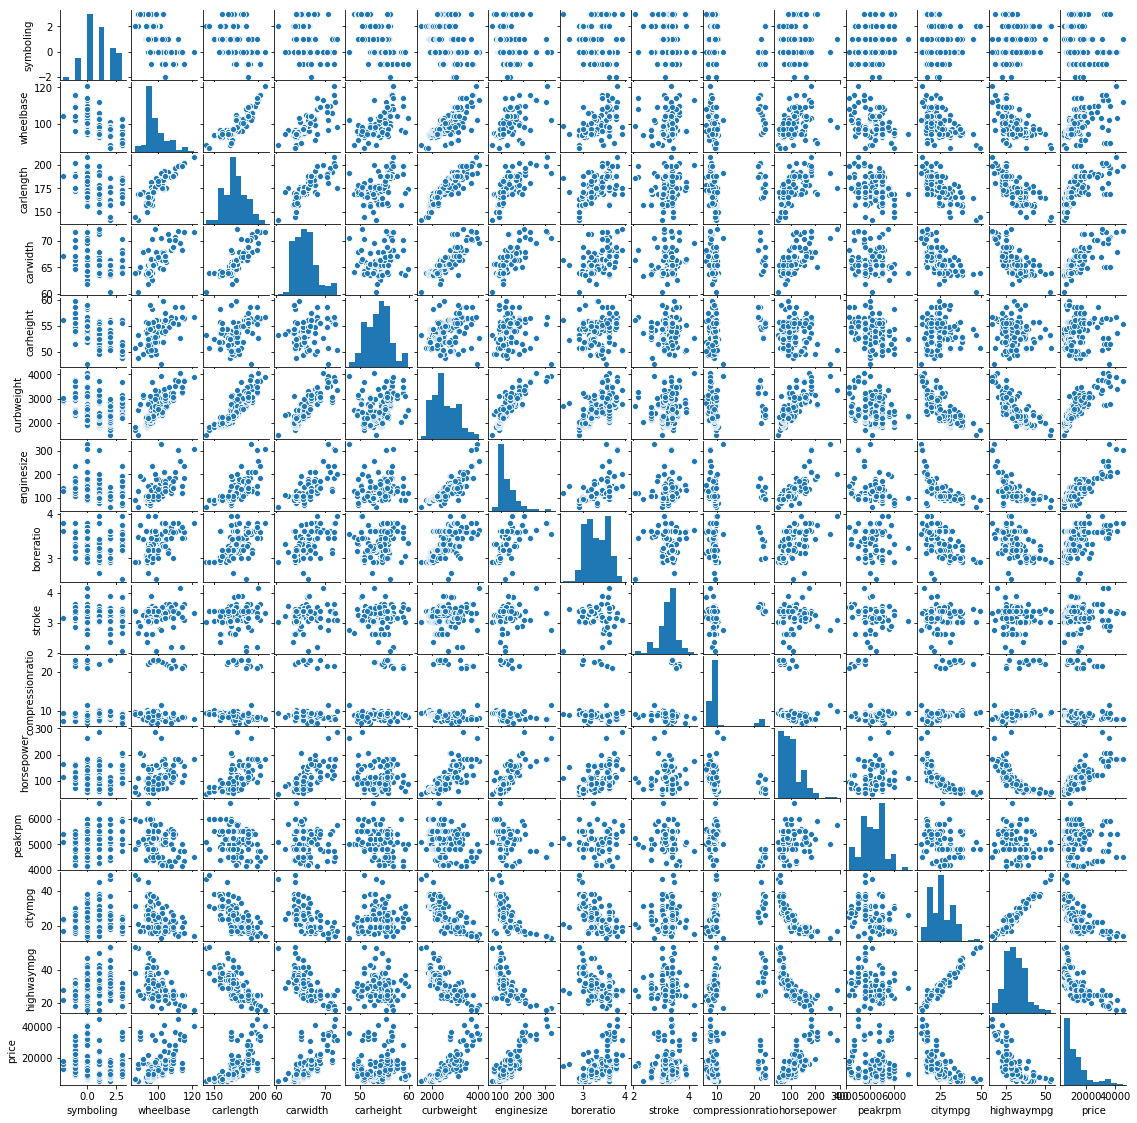

In [11]:
g=sns.pairplot(carprice,height=10, aspect=0.5)
g.fig.set_size_inches(15,15)
plt.show()

Considering our dependent variable `Price` from the above pairplot, we can see some linear pattern for  highwaympg , citympg , enginesize , curbweight  variables.

#### Visualizing categorical variables

Following are the categorical variables in the dataset.

CompanyName	fueltype	aspiration	doornumber	carbody	drivewheel	enginelocation	enginetype	cylindernumber	fuelsystem

### Analysis for various companies

In [12]:
def cat_plot(xvar):
    sns.barplot(x=xvar, y='price', data=carprice)

In [13]:
def cat_boxplot(xvar):
    sns.boxplot(x=xvar, y='price', data=carprice)

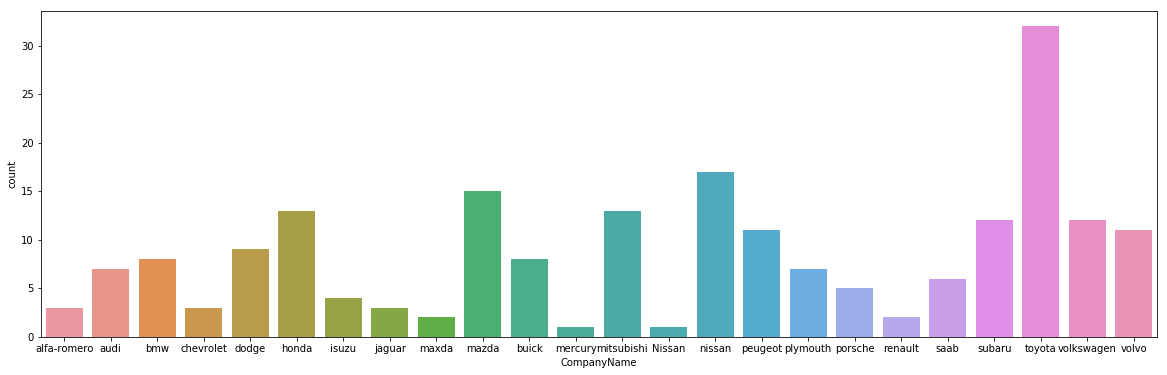

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x='CompanyName',data=carprice)

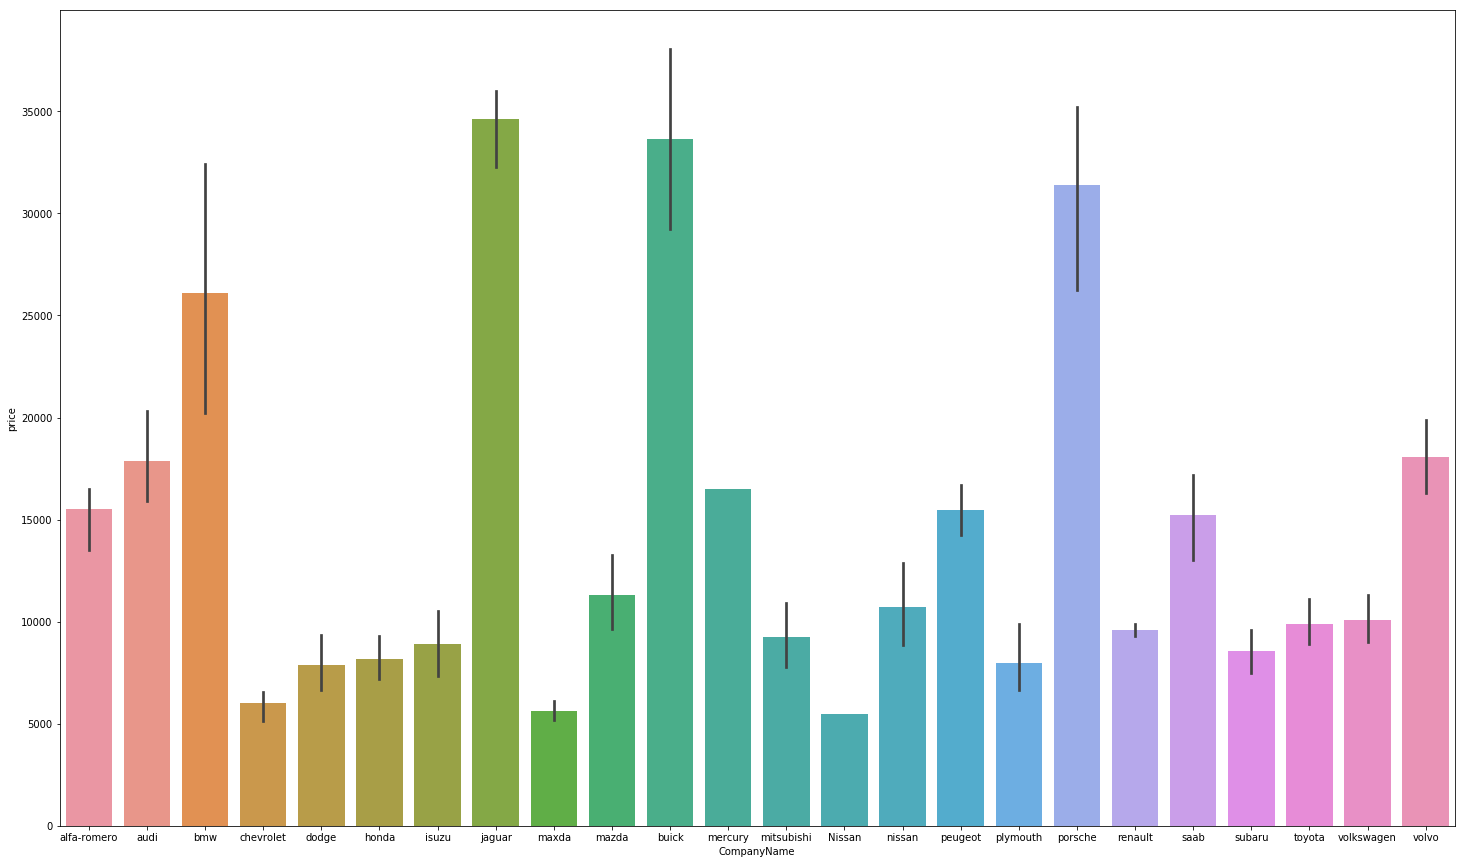

In [15]:
plt.figure(figsize=(25,15))
cat_plot('CompanyName')
plt.show()

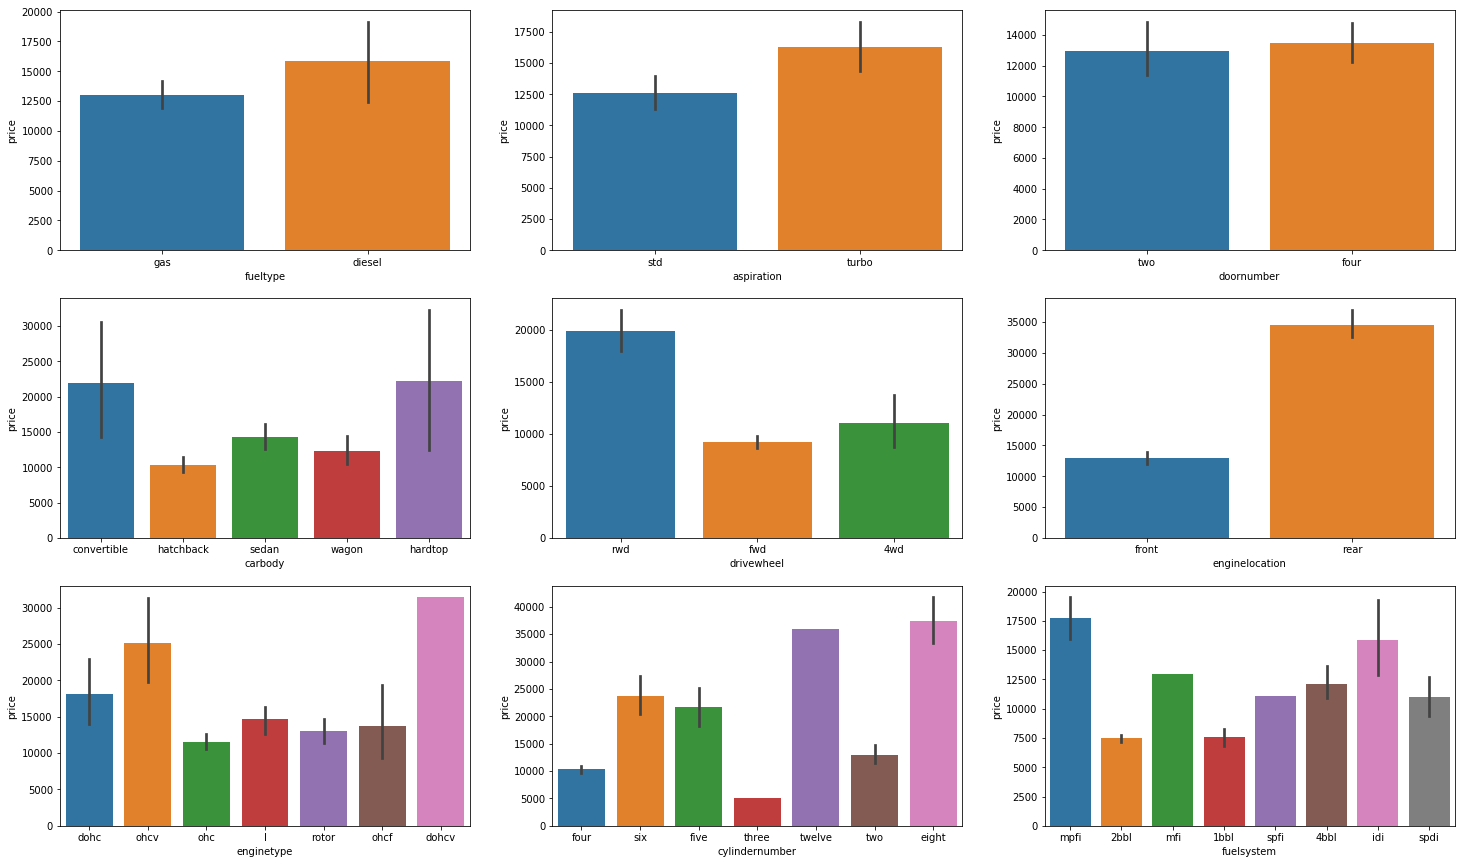

In [16]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
cat_plot('fueltype')
plt.subplot(3,3,2)
cat_plot('aspiration')
plt.subplot(3,3,3)
cat_plot('doornumber')
plt.subplot(3,3,4)
cat_plot('carbody')
plt.subplot(3,3,5)
cat_plot('drivewheel')
plt.subplot(3,3,6)
cat_plot('enginelocation')
plt.subplot(3,3,7)
cat_plot('enginetype')
plt.subplot(3,3,8)
cat_plot('cylindernumber')
plt.subplot(3,3,9)
cat_plot('fuelsystem')
plt.show()

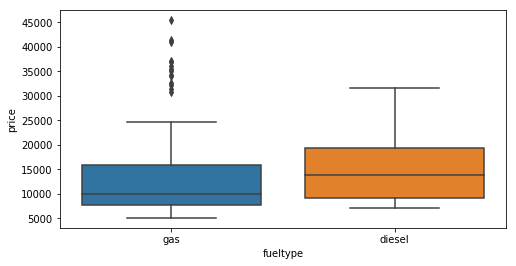

In [17]:
plt.figure(figsize=(8,4))
cat_boxplot('fueltype')
plt.show()

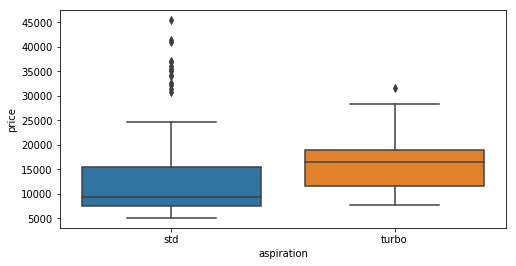

In [18]:
plt.figure(figsize=(8,4))
cat_boxplot('aspiration')
plt.show()

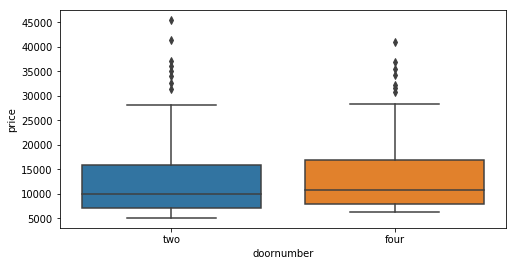

In [19]:
plt.figure(figsize=(8,4))
cat_boxplot('doornumber')
plt.show()

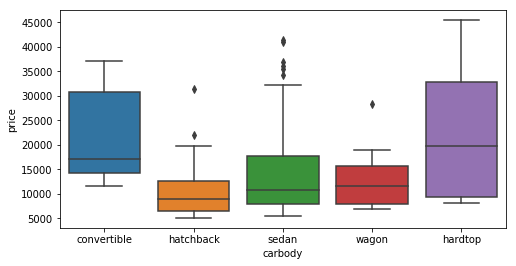

In [20]:
plt.figure(figsize=(8,4))
cat_boxplot('carbody')
plt.show()

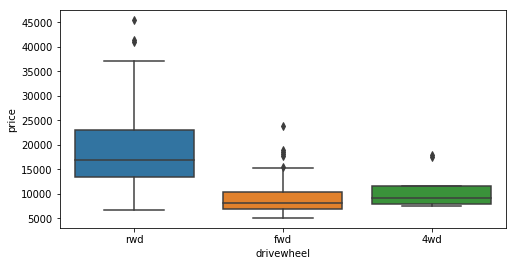

In [21]:
plt.figure(figsize=(8,4))
cat_boxplot('drivewheel')
plt.show()

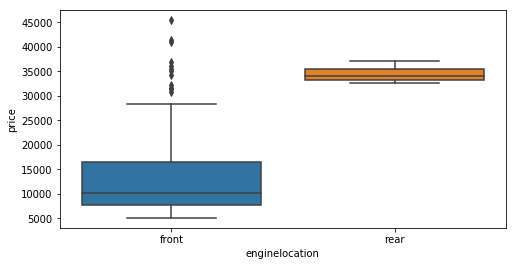

In [22]:
plt.figure(figsize=(8,4))
cat_boxplot('enginelocation')
plt.show()

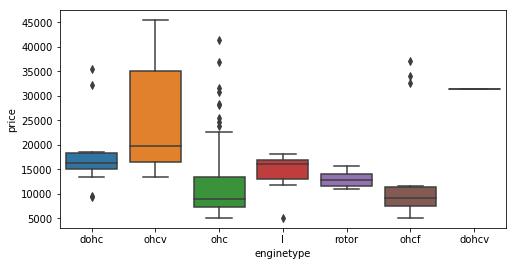

In [23]:
plt.figure(figsize=(8,4))
cat_boxplot('enginetype')
plt.show()

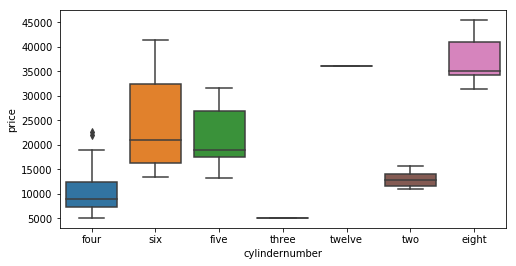

In [24]:
plt.figure(figsize=(8,4))
cat_boxplot('cylindernumber')
plt.show()

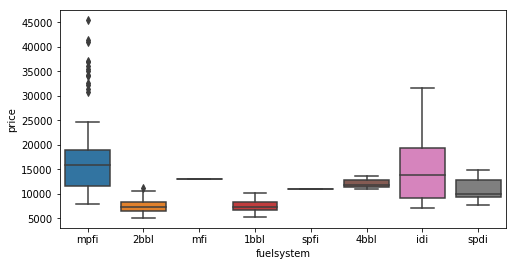

In [25]:
plt.figure(figsize=(8,4))
cat_boxplot('fuelsystem')
plt.show()

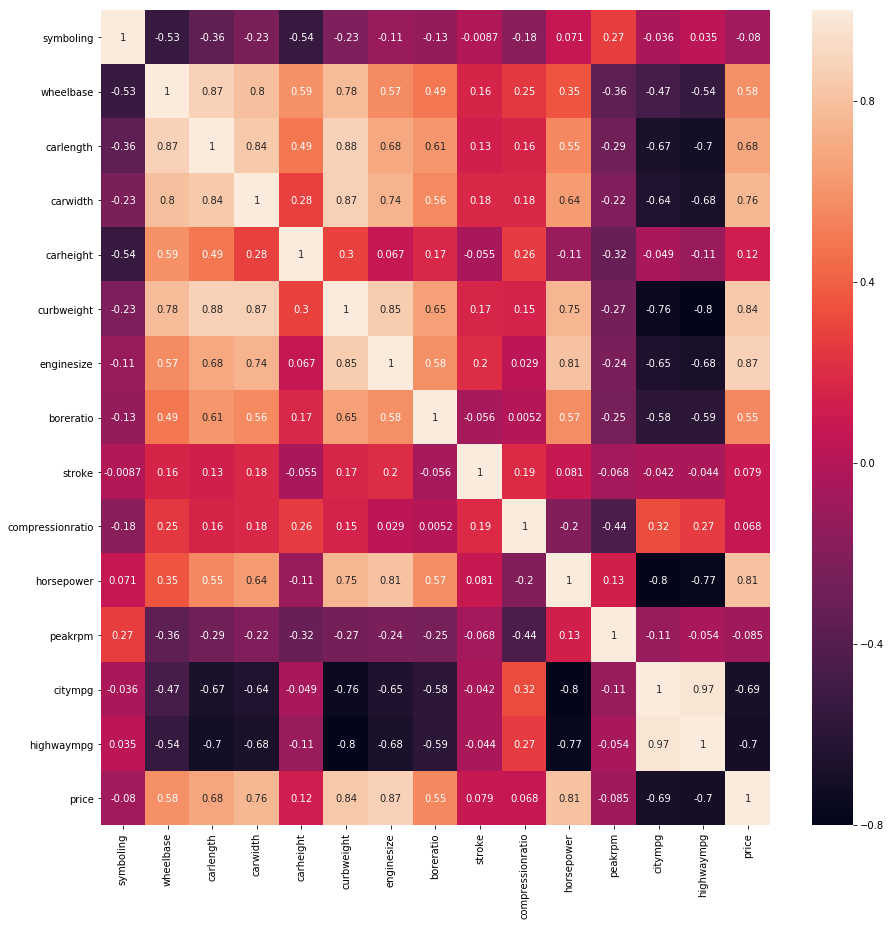

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(carprice.corr(), annot=True)

Looking at the heatmap above without doing scaling, we can see `price` is correlated with enginesize mostly.

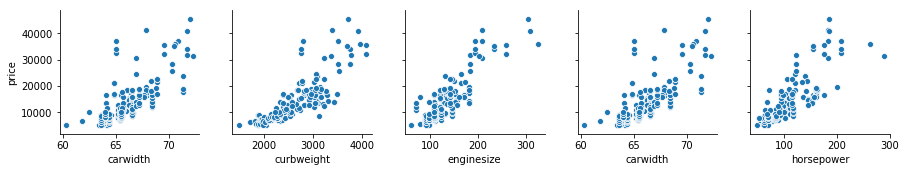

In [27]:
sns.pairplot(data=carprice, x_vars=['carwidth','curbweight','enginesize', 'carwidth', 'horsepower'],y_vars='price')

## Step 3: Data Preparation

In the data set, there are some variables which have two values. We can convert them to 0/1 pair also we can create dummy variables to quantify categorical variables.

In [28]:
carprice_dummies=pd.get_dummies(carprice,drop_first=True)

In [29]:
carprice_dummies.shape
carprice_dummies.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_alfa-romero',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'Compa

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling through MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# applying scaler to all the numerical attributes
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','symboling',
         'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.090909,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.288490,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


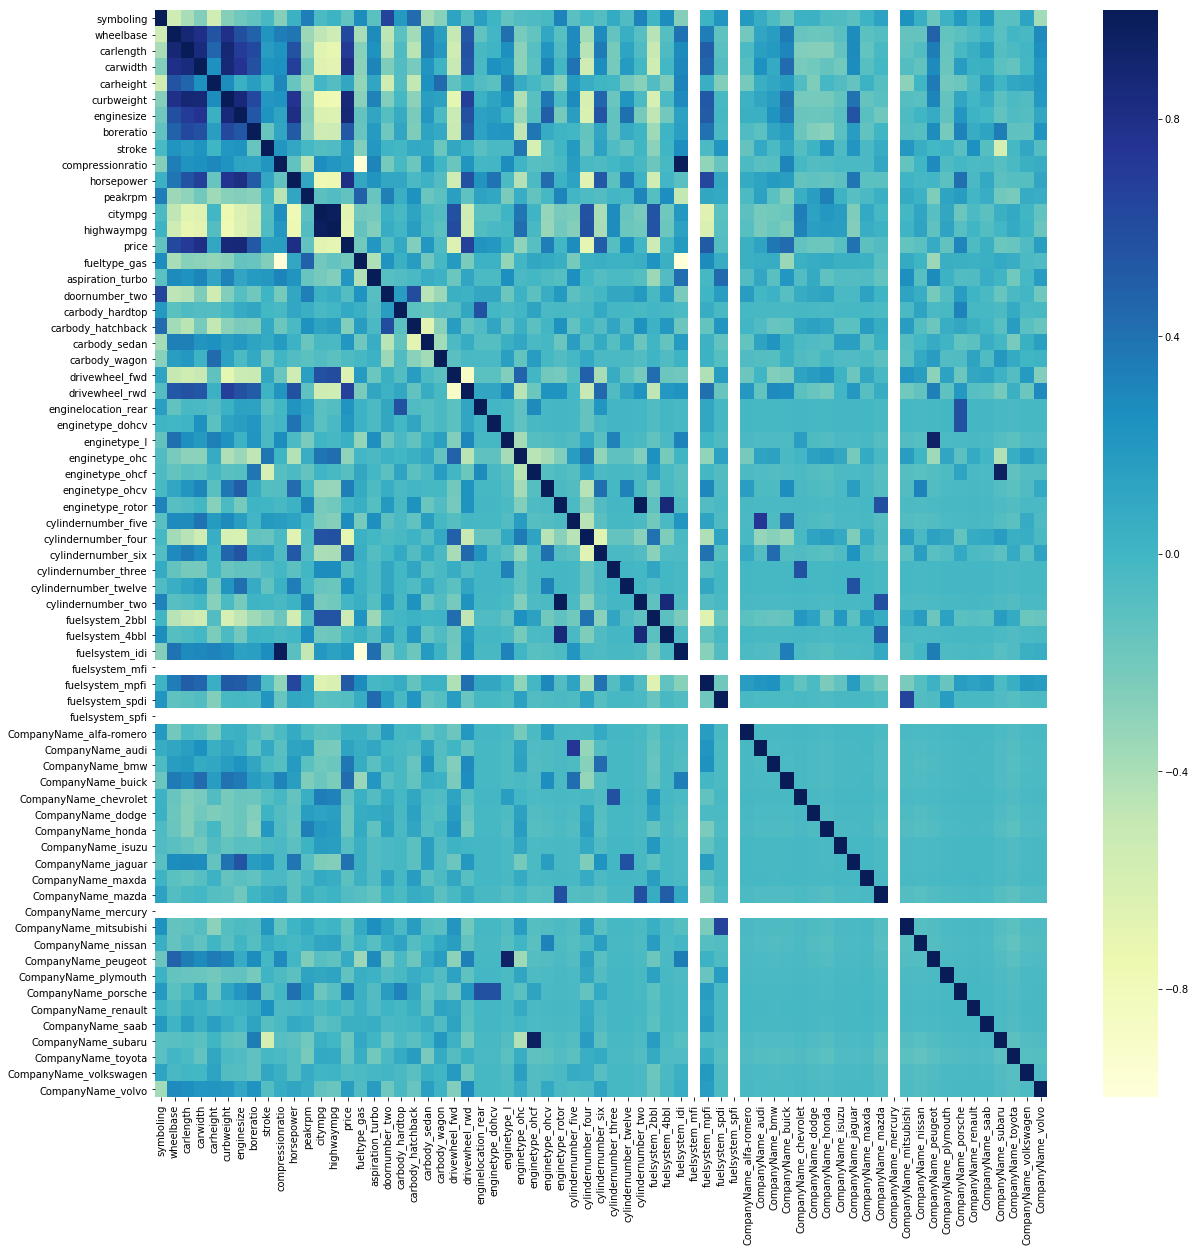

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), cmap='YlGnBu')

Like we saw earlier, the correlation seems to be intact for the train data-set.

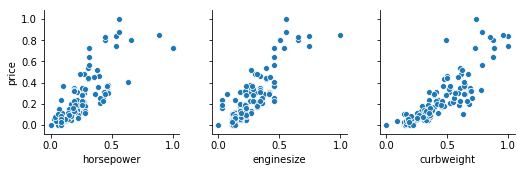

In [36]:
sns.pairplot(x_vars=['horsepower','enginesize','curbweight'],y_vars='price', data=df_train)

## Step 5: Building a linear model

#### Using RFE (Recursive feature elimination) and Manual Approach together

### Dividing into X and Y sets for the model building

In [37]:
y_train=df_train.pop('price')
x_train=df_train

In [38]:
# Importing RFE and Linear regression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Using RFE with the limit of output variable = 12
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,12)
rfe=rfe.fit(x_train,y_train)

In [40]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 46),
 ('wheelbase', False, 15),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 23),
 ('horsepower', False, 13),
 ('peakrpm', False, 14),
 ('citympg', False, 37),
 ('highwaympg', False, 24),
 ('fueltype_gas', False, 22),
 ('aspiration_turbo', False, 12),
 ('doornumber_two', False, 45),
 ('carbody_hardtop', False, 29),
 ('carbody_hatchback', False, 28),
 ('carbody_sedan', False, 30),
 ('carbody_wagon', False, 31),
 ('drivewheel_fwd', False, 50),
 ('drivewheel_rwd', False, 40),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 10),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 52),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 39),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', False, 2),
 ('cylindernumber_six', False, 26),
 ('c

In [41]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'CompanyName_bmw',
       'CompanyName_porsche'],
      dtype='object')

In [42]:
x_train_rfe=x_train[col]

- ### First Model on train data-set

In [43]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.86e-65
Time:                        23:30:30   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [44]:
# dropping column with p-value > 0.05
x_train_new=x_train_rfe.drop(['cylindernumber_twelve'], axis=1)

In [45]:
# recreate model and check its summary
x_train_new=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     141.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.97e-65
Time:                        23:30:30   Log-Likelihood:                 192.84
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     132   BIC:                            -331.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1163 

- ### Second Model on train data-set

In [46]:
# dropping stroke variable and then checking its summary
x_train_new1=x_train_new.drop(['stroke'], axis=1)
x_train_new1=sm.add_constant(x_train_new1)
lm = sm.OLS(y_train,x_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        23:30:30   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [47]:
# calculateing the VIFs for the variables selected
x_train_newconst=x_train_new1.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_newconst
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,enginetype_rotor,inf
7,cylindernumber_two,inf
1,curbweight,38.410000
0,carwidth,24.990000
2,enginesize,17.700000
3,boreratio,9.700000
9,CompanyName_porsche,1.660000
4,enginelocation_rear,1.600000
8,CompanyName_bmw,1.140000
6,cylindernumber_three,1.010000


- ### Third Model on train data-set

In [48]:
# dropping enginetype_rotor variable which has infinite VIF
x_train_new2=x_train_new1.drop(['enginetype_rotor'],axis=1)
x_train_new2=sm.add_constant(x_train_new2)
lm = sm.OLS(y_train,x_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        23:30:31   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [49]:
# calculateing the VIFs for the variables selected
x_train_newconst=x_train_new2.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_newconst
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
8,CompanyName_porsche,1.66
4,enginelocation_rear,1.60
6,cylindernumber_two,1.21
7,CompanyName_bmw,1.14
5,cylindernumber_three,1.01


- ### Fourth Model on train data-set

In [50]:
# dropping curbweight which has high VIF values mean high multicollinearity
x_train_new3=x_train_new2.drop(['curbweight'],axis=1)
x_train_new3=sm.add_constant(x_train_new3)
lm = sm.OLS(y_train,x_train_new3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.01e-63
Time:                        23:30:31   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [51]:
# calculateing the VIFs for the variables selected
x_train_newconst=x_train_new3.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_newconst
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
3,enginelocation_rear,1.60
7,CompanyName_porsche,1.59
5,cylindernumber_two,1.17
6,CompanyName_bmw,1.14
4,cylindernumber_three,1.01


- ### Fifth Model on train data-set

In [52]:
# dropping boreration has it has high p-value which makes it insignificant any way
x_train_new4=x_train_new3.drop(['boreratio'],axis=1)
x_train_new4=sm.add_constant(x_train_new4)
lm = sm.OLS(y_train,x_train_new4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.04e-64
Time:                        23:30:31   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [53]:
# calculateing the VIFs for the variables selected
x_train_newconst=x_train_new4.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_newconst
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,enginesize,9.98
0,carwidth,9.69
2,enginelocation_rear,1.58
6,CompanyName_porsche,1.57
4,cylindernumber_two,1.16
5,CompanyName_bmw,1.14
3,cylindernumber_three,1.00


- ### Sixth Model on train data-set

In [54]:
# dropping CompanyName_porsche which again has high p-value
x_train_new5=x_train_new4.drop(['CompanyName_porsche'],axis=1)
x_train_new5=sm.add_constant(x_train_new5)
lm = sm.OLS(y_train,x_train_new5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.62e-64
Time:                        23:30:31   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [55]:
# calculateing the VIFs for the variables selected
x_train_newconst=x_train_new5.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_newconst
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,enginesize,9.98
0,carwidth,9.63
4,cylindernumber_two,1.16
5,CompanyName_bmw,1.13
2,enginelocation_rear,1.08
3,cylindernumber_three,1.00


This is my final model. Even though the VIF values are greater than 5 but they are below 10 and the corresponding p-values and 
adjusted r-square looks pretty good. 

# Step 6: Residual Analysis on Train Data-set

In [56]:
# predicting values for y on train data
y_train_price= lm.predict(x_train_new5)

Text(0.5,0,'Errors')

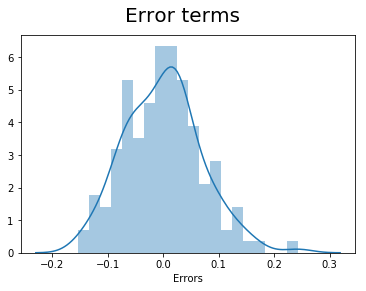

In [57]:
# visualizing the residuals error terms
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors')

The residuals look normally distributed with slight variation towards the right end. Also their mean is about 0 so we are good to go here too.

# Step 8: Prediction using Final Model

In [58]:
# applying scaler to all the numerical attributes
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','symboling',
         'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[num_vars]=scaler.transform(df_test[num_vars])

### Dividing into X and Y sets for the model evaluation

In [59]:
y_test = df_test.pop('price')
x_test = df_test

In [60]:
# using final model for prediction

#create new x test dataframe with the columns of final train dataset
x_test_new=x_test[x_train_newconst.columns]

# adding constant for making prediction
x_test_new=sm.add_constant(x_test_new)

In [61]:
# making predictions
y_pred=lm.predict(x_test_new)

# Step 9: Model Evaluation

In [62]:

y_lm = sm.OLS(y_test,x_test_new).fit()
print(y_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.28e-28
Time:                        23:30:33   Log-Likelihood:                 75.634
No. Observations:                  62   AIC:                            -141.3
Df Residuals:                      57   BIC:                            -130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2152 

Text(0,0.5,'y_pred')

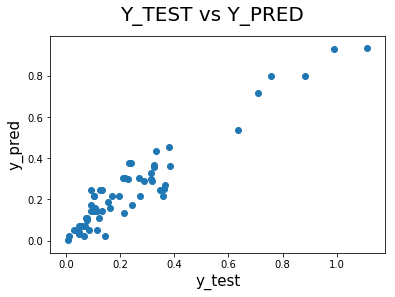

In [63]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
plt.suptitle("Y_TEST vs Y_PRED", fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9013443522816883

With this model, I found the following are the driver variables with goodness of fit score (r2 score =0.9013)
- carwidth
- enginesize
- enginelocation_rear
- cylindernumber_three
- cylindernumber_two
- CompanyName_bmw
